# Aplicando SVM para classificação de vinhos

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importando o dataset

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

### Leitura dos dados

In [4]:
X = wine.data

In [5]:
y = wine.target

In [6]:
X.shape, y.shape

((178, 13), (178,))

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Dividindo os dados

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
ts = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

## Treinando o SVM

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [12]:
model_clean = make_pipeline(StandardScaler(), SVC())

## SVM

### Procurando os `Kernels`

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model_clean, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 327 ms, sys: 10.7 ms, total: 338 ms
Wall time: 336 ms
{'svc__C': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__kernel': 'linear'}


In [15]:
model_clean = grid.best_estimator_
y_fit = model_clean.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                            target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      0.96      0.98        24
     class_2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



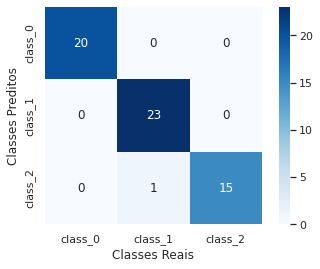

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

### Testando os `kernels` e parâmetros

In [18]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

In [19]:
def gs_best_params(C_list, gamma_list, decision_list, X_test):
    
    for kernel in kernel_list:
        model = make_pipeline(StandardScaler(), SVC(kernel=kernel))
        
        if kernel == 'linear':
            param_grid = {
                'svc__C': C_list,
                'svc__decision_function_shape':  decision_list
            }
        else:
            param_grid = {
                'svc__C': C_list,
                'svc__gamma': gamma_list,
                'svc__decision_function_shape':  decision_list
            }
        
        grid = GridSearchCV(model, param_grid)
        print(f"### Grid Search ({model.named_steps.svc.kernel}) ###")
        %time grid.fit(X_train, y_train)
        print(grid.best_params_)
        model = grid.best_estimator_
        y_fit = model.predict(X_test)
        print("### Classification report ###")
        print(classification_report(
            y_test, y_fit, target_names=wine.target_names)
        )
        mat = confusion_matrix(y_test, y_fit)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=wine.target_names,
                    yticklabels=wine.target_names,cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.xlabel('Classes Reais')
        plt.ylabel('Classes Preditas');
        plt.show()
        print("\n")

### Grid Search (linear) ###
CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 121 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo'}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      0.96      0.98        24
     class_2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



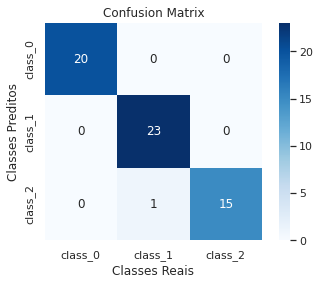



### Grid Search (poly) ###
CPU times: user 635 ms, sys: 0 ns, total: 635 ms
Wall time: 634 ms
{'svc__C': 30, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.05}
### Classification report ###
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.98        20
     class_1       1.00      0.96      0.98        24
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



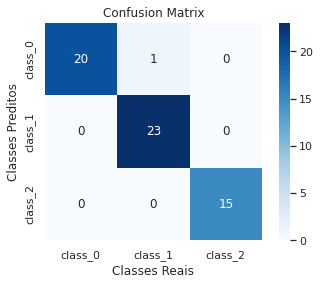



### Grid Search (rbf) ###
CPU times: user 683 ms, sys: 0 ns, total: 683 ms
Wall time: 682 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.01}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      1.00      1.00        24
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



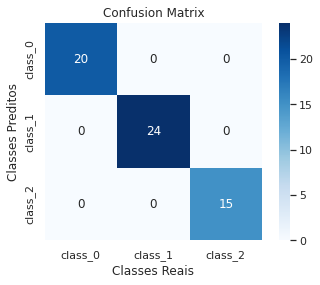



### Grid Search (sigmoid) ###
CPU times: user 700 ms, sys: 0 ns, total: 700 ms
Wall time: 699 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.05}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      1.00      1.00        24
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



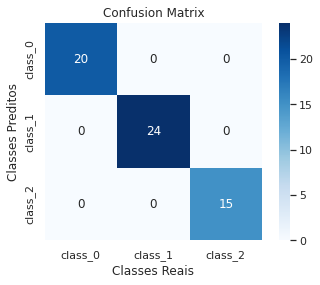

In [20]:
C_list = [0.001, 0.05, 1, 5, 10, 30, 40]
gamma_list = [0.001, 0.005, 0.01, 0.05, 1]
decision_list = ['ovo', 'ovr']

gs_best_params(C_list, gamma_list, decision_list, X_test)